## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%%timeit
from ContinuousContract_inv_slow import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p)
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

EJinv avg diff 0.13930605837069693
EJinv max diff 9.28698815272015
EJinv avg diff 0.14433167381818557
EJinv max diff 8.961656352170577
EJinv avg diff 0.20841694359976382
EJinv max diff 72.71092965283698
EJinv avg diff 0.22824231417089674
EJinv max diff 96.81074142320432
EJinv avg diff 0.1890134543112496
EJinv max diff 20.60412755098046
EJinv avg diff 0.18428113946458252
EJinv max diff 12.880758238903944
EJinv avg diff 0.2016590592258648
EJinv max diff 12.674597960264885
EJinv avg diff 0.2311628711346489
EJinv max diff 25.946301484126863
EJinv avg diff 0.25330470100715435
EJinv max diff 33.04241544226071
EJinv avg diff 0.24621976206114107
EJinv max diff 31.599050267692586
EJinv avg diff 0.28725405486832445
EJinv max diff 42.01861026380982
EJinv avg diff 0.2876799705958928
EJinv max diff 31.15185005289189
EJinv avg diff 0.38536991530534187
EJinv max diff 139.25095150817313
EJinv avg diff 0.4519111275357122
EJinv max diff 236.34619451318392
EJinv avg diff 0.37512273583258826
EJinv max dif

In [3]:
#print("Before first call:", cc.__dict__)
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi)=cc.J()
#print("After first call:", cc.__dict__)

Value diff: 621.7834188342574
Value diff: 7199.699195290678
Value diff: 5059.965709561498
Value diff: 3867.7571726936285
Value diff: 3182.795223206438
Value diff: 3009.305486426234
Value diff: 2956.8148490990807
Value diff: 2941.122223258508
Value diff: 3147.2576352209817
Value diff: 3289.105090625784
Value diff: 3563.9770079260015
Value diff: 10342.73190776858
Value diff: 9074.807054348319
Value diff: 8638.164576759125
Value diff: 8212.355634569853
Value diff: 8203.744114260364
Value diff: 8236.35885495718
Value diff: 8264.845801666328
Value diff: 8036.794546868121
Value diff: 8010.612254303094
Value diff: 7729.224893782433
Value diff: 7421.490184338036
Value diff: 7717.871687651859
Value diff: 7771.857602329823
Value diff: 7509.893121730944
Value diff: 7366.81230601776
Value diff: 7154.485536448701
Value diff: 7064.482485235087
Value diff: 6772.481110294058
Value diff: 6460.053874806406
Value diff: 6178.813511781242
Value diff: 5990.506177080169
Value diff: 6662.591730164408
Value di

In [22]:
(cc.fun_prod.min()-cc.fun_prod.max())/(1-p.beta) #Bruh. Paying THE HIGHEST wage all the time at THE LOWEST productivity still yields better value than what the polynomial predicts.
#Yeah, I don't see why I should keep using the parametric approximation.
#Maybe it's better for the middle values or something???
#I dunno man, this stuff's weird 

-909.6865123407565

In [4]:
from ContinuousContract_inv import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) #this is continuous contract with FOC that writes the expectation as a function of today's value
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

In [4]:
from ContinuousContract_inv_avgw import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) 
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

In [ ]:
#(ccinv_J,ccinv_W,ccinv_Wstar)=cc.J() #wtf??? this takes SO MUCH MORE TIME!!!

# Plots

In [4]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

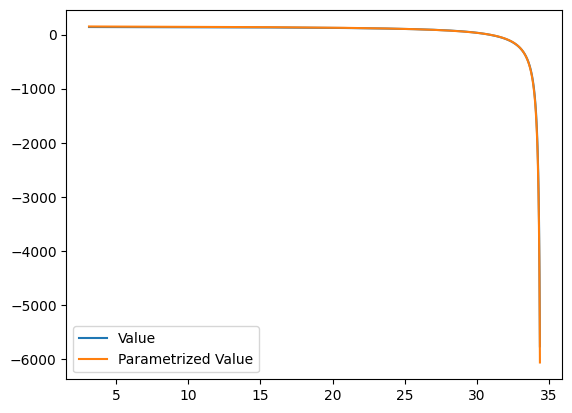

In [5]:
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Value')
plt.plot(cc_W[p.z_0-1, :], cc_Jpi[p.z_0-1, :], label='Parametrized Value')
plt.legend()
plt.show()

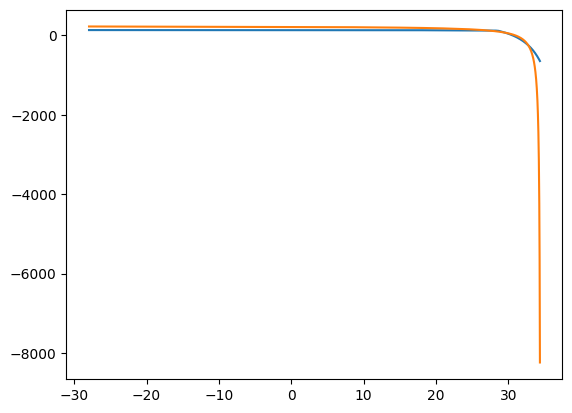

In [5]:
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Value')
plt.plot(cc_W[p.z_0-1, :], cc_Jpi[p.z_0-1, :], label='Parametrized Value')
plt.legend()
plt.show()

Text(0, 0.5, 'Future value')

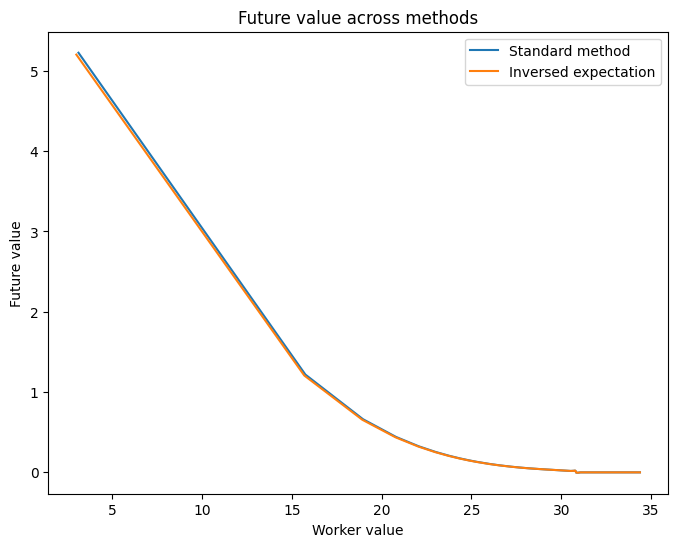

In [5]:
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_Wstar[p.z_0-1, :]-cc_W[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_Wstar[p.z_0-1, :]-ccinv_W[p.z_0-1,:], label='Inversed expectation')
plt.legend()
# Add titles and labels
plt.title('Future value across methods')
plt.xlabel('Worker value')
plt.ylabel('Future value')

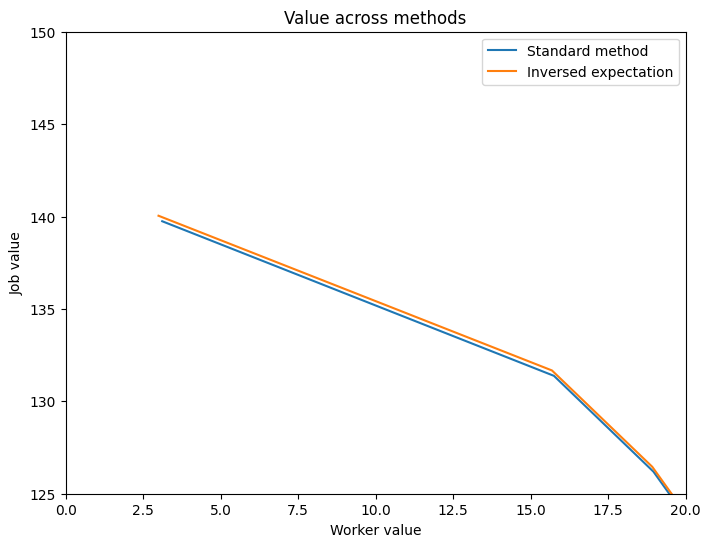

In [10]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_J[p.z_0-1, :], label='Inversed expectation')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods.png'), bbox_inches='tight')  # Save as PNG
#

# Optionally set x and y limits
#plt.xlim([0, 20])
#plt.ylim([125, 150])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

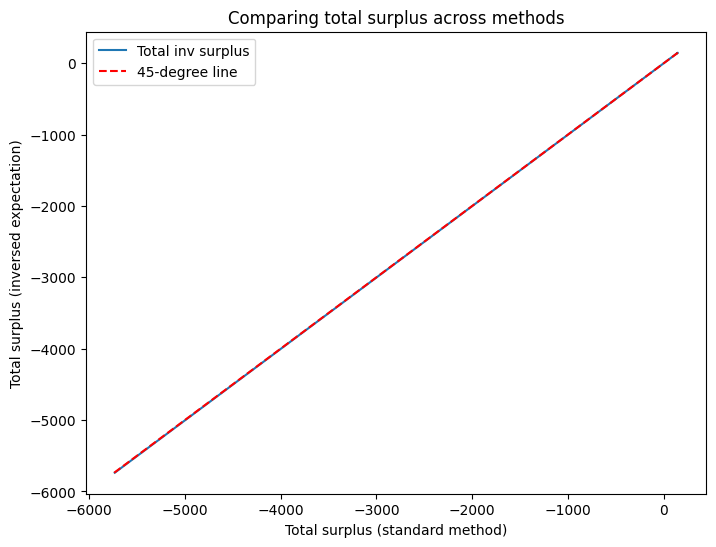

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], ccinv_W[p.z_0-1,:]+ccinv_J[p.z_0-1,:], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = ccinv_W[p.z_0-1,:] + ccinv_J[p.z_0-1,:]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()